In [1]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#HANDLING CATEGORICAL DATA

In [4]:
datasets = pd.read_csv('Position_Salaries.csv')
from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)

[[0 0]
 [4 1]
 [8 2]
 [5 3]
 [3 4]
 [7 5]
 [6 6]
 [9 7]
 [1 8]
 [2 9]]


#GRAPHS

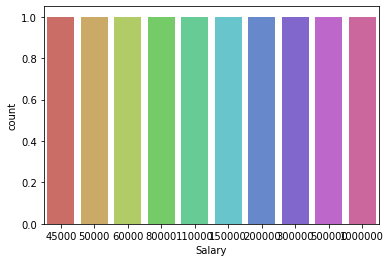

In [5]:
seaborn.countplot(x='Salary',data=dataset, palette='hls')
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [6]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#NORMALIZING DATA

In [7]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#ALGORITHM

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

#FITTING OF TRAINING DATA

In [9]:
model = regressor.fit(x,y)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [10]:
Y_Pred = regressor.predict(X_Test)

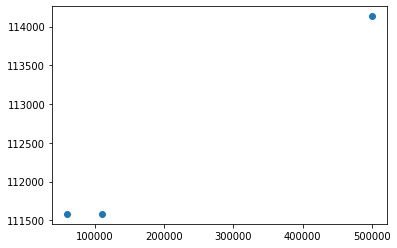

In [11]:
plt.scatter(Y_Test,Y_Pred)

#EVALUATION

In [12]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_Pred)    # initialise a matrix full with zeros
y_pred_classes[Y_Pred > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(Y_Pred)
y_test_classes[Y_Test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


In [14]:
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_Test) 


array([111583.33333333, 114133.33333333, 111583.33333333])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [16]:
Y_Train = Y_Train[0:3]
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_Pred)    # initialise a matrix full with zeros
y_pred_classes[Y_Pred > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(Y_Pred)
y_train_classes[Y_Train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[3]]


Precision, Recall, Support, Fscore

In [17]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_Pred)    # initialise a matrix full with zeros
y_pred_classes[Y_Pred > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(Y_Pred)
y_train_classes[Y_Train > cutoff] = 1

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [18]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_Pred)    # initialise a matrix full with zeros
y_pred_classes[Y_Pred > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(Y_Pred)
y_test_classes[Y_Test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[3]]


Precision, Recall, Support, Fscore

In [19]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_Pred)    # initialise a matrix full with zeros
y_pred_classes[Y_Pred > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(Y_Pred)
y_test_classes[Y_Test > cutoff] = 1

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)